# **Car Prices in India Dataset**

## **PHASE 2 REPORT - Statistical Modelling**

#### Group Number - 11
##### - Group Members and IDs
   * Aarav Jain - s3943906
   * Ahnaf Tausif - s3890097
   * Kushagra Baghel - s3882120
   * Mayank Deepak Thakkar - s3885003
   * Vishwas Aggarwal - s3859098

## Table of Contents
* [Introduction](#itr)
  + [Phase 1 Summary](#p1_summary)
  + [Report Overview](#report_overview)
  + [Overview Of Methodology](#overview_of_methodology)
* [Statistical Modelling](#statistical_modelling)
  + [Full Model Overview](#full_model_overview)
  + [Module Imports](#module_imports)
* [Full Model Diagnostic Checks](#full_model_diagnostic_checks)

## Introduction <a id='itr'></a>

### Phase 1 Summary <a id='p1_summary'></a>

* DATASET - 
In Phase 1 part of the project, we used an interesting dataset that helped us to predict the prices of used cars in the country 'India', which is also known as the Second most populous country with an average population of 1.3 billion and about 296 million running/registered vehicles.

* ATTRIBUTES - 
The dataset contained various columns/attributes namely: Unnamed: 0, Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats and the target feature, that is Price.

* DROPPING ATTRIBUTES - 
However, there were some attributes that were not very useful for predicting the price of the car. In order to keep the dataset accurate, we started by dropping the columns/attributes that were not very useful. This process took place in the section - 'Data Cleaning and Preprocessing'.

* DROPPED VALUES - 
The values that we dropped were -  Unnamed: 0, new_price and Name.

* DATATYPES - 
In order to make sure that the dataset has correct datatypes associated with its attributes, we cross-checked the datatypes of all the attributes that came out to be correct.

* MISSING VALUES - 
For a dataset to be perfect and provide accurate results further, we need to make sure that there are no missing values in the whole dataset. For the same, we checked for any missing values by checking the ampount of missing values in all the columns.

* DROPPING OBSERVATIONS WITH MISSING VALUES - 
We found some missing values in the columns namely - Mileage, Engine, Power and Seats. For the dataset to be perfect, we dropped the observations with missing values and verified whether the missing values were successfully dropped to avoid any future errors in part 'Data Exploration and Visualisation'. Now, the whole dataset was considered to be cleaned. Then, we jumped to the part called 'Data Exploration and Visualisation'. In this part, we started exploring and visualising various features in combination with each other.

* DATA EXPLORATION AND VISUALISATION - 
In this part, we started exploring and visualising various features in combination with each other. We started by visualsing the data by plotting various one-variable, two-variable and three-variable plots in the form of various figures, graphs, boxplots, scatterplots and histograms taking into consideration different combinations that help us predict the prices of the used cars.

* PLOTS - 
For two-variable plots we considered the combinations like  price-transmission, kilometers_driven - fuel_type, price - owner_type, etc. and for three-variable plots we considered the combinations like price - broken down by transmission and owner_type, price - broken down by owner_type and fuel_type, etc.






* To conclude the Phase 1 report summary, this helped us to figure out various conclusions which helped in predicting the car prices --*Not sure about this point --*

### Report Overview <a id='report_overview'></a>

In Phase-2 part part of the project, we focus on the statistical modelling of the dataset being used. This report will be having some important section like:
1. Statistical Modelling: This section consists five parts:

   A) Full model overview - An overview of the full model with the information of various terms and variables being used in it.
   
   B) Full model Diagnostic Checks - A full diagnostic check for finding out if there are any indications of the violations in the regression      assumptions taken in the model.

   C) Feature Selection - In this section we would be performing backward feature selection using p-values.

   D) Reduced model Overview - In this section, we would be givign an overview of of the reduced model, i.e. the model after performing the feature selection part. in this we would be giving similar overview as full model overview where we displayed the informtion about various terms and variables used in the reduced model.

   E) Reduced Model Diagnostic Checks - A full diagnostic check for the reduced model, similar to the diagnostuc check performed for the full model in the earlier sections.
   

2. Critique and Limitations - Various strengths and weaknesses of our approach will be provided in detail in this section.


3. Summary and Conclusion - This consistes of three parts:
   A) Project Summary - A detailed combined summary of both Phase-1 and Phase-2 projects.

   B) Summary of Findings - Summary of all out findings about the problems we were focusing on.

   C) Conclusion - Finally, a detailed conclusion in which where we will showcase our goals and objectives that were met in this project.

### Overview Of Methodology <a id='overview_of_methodology'></a>

## Statistical Modelling <a id='statistical_modelling'></a>

### Full Model Overview <a id='full_model_overview'></a>

Our database model consists of 9 features and 6020 total observations

We use the following variables in our dataset -

* Name - The name of the car including brand and model
* Location - The georaphical location of where the car is available to purchase
* Year - The year in which the car was bought in a new condition
* Kilometers Driven - The total distance driven in the car by its previous owners
* Fuel type - The kind of fuel used by the car like Petrol,Diesel,CNG
* Transmission - The transmission used by the car(Manual/Automatic)
* Owner Type - The number of owners a car has had
* Mileage - The mileage offered by the car in kmpl or km/kg
* Engine - The displacement value of the engine in CC

### Module Imports <a id='module_imports'></a>

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('train-data.csv')

Let's look at our clean dataset where the values that are not required in order to predict the price of the used cars are dropped first, like - "Unnamed: 0", "New_Price" and "Name". And we need to drop the colums that have totally unique values like "Mileage", "Power" and "Engine" because these columns can give problems when performing Full model overview where we perform dummy-encoding.

In [162]:
df = df.drop(columns=["Unnamed: 0","New_Price", "Name", "Mileage", "Power", "Engine"]) 
df = df.dropna()
df.drop(df[df['Owner_Type'] == "Fourth & Above"].index, inplace = True)

In [163]:
df.shape

(5969, 8)

 Let us view the clean dataset like we preprocessed in Phase 1

In [164]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74


We use the get_dummies() function of pandas to get a one-hot encoding of the dataset

In [165]:
data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
0,2010,72000,5.0,1.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2,2011,46000,5.0,4.50,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,2012,87000,7.0,6.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,2013,40670,5.0,17.74,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [166]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='Price').columns)
formula_string_encoded = 'Price ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  Price ~ Year + Kilometers_Driven + Seats + Location_Bangalore + Location_Chennai + Location_Coimbatore + Location_Delhi + Location_Hyderabad + Location_Jaipur + Location_Kochi + Location_Kolkata + Location_Mumbai + Location_Pune + Fuel_Type_Diesel + Fuel_Type_Electric + Fuel_Type_LPG + Fuel_Type_Petrol + Transmission_Manual + Owner_Type_Second + Owner_Type_Third


In [167]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=data_encoded)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     258.9
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:37:42   Log-Likelihood:                -21026.
No. Observations:                5969   AIC:                         4.209e+04
Df Residuals:                    5948   BIC:                         4.223e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1474.5691    

In [168]:
residuals_full = pd.DataFrame({'actual': data_encoded['Price'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,1.75,0.469797,1.280203
1,12.50,8.037574,4.462426
2,4.50,0.977971,3.522029
3,6.00,6.992286,-0.992286
4,17.74,22.896891,-5.156891
5,2.35,3.990524,-1.640524
6,3.50,6.528488,-3.028488
7,17.50,22.990225,-5.490225
8,5.20,6.612076,-1.412076
9,1.95,6.122669,-4.172669


Let's try to plot the values - Actual Price vs Predicted Price

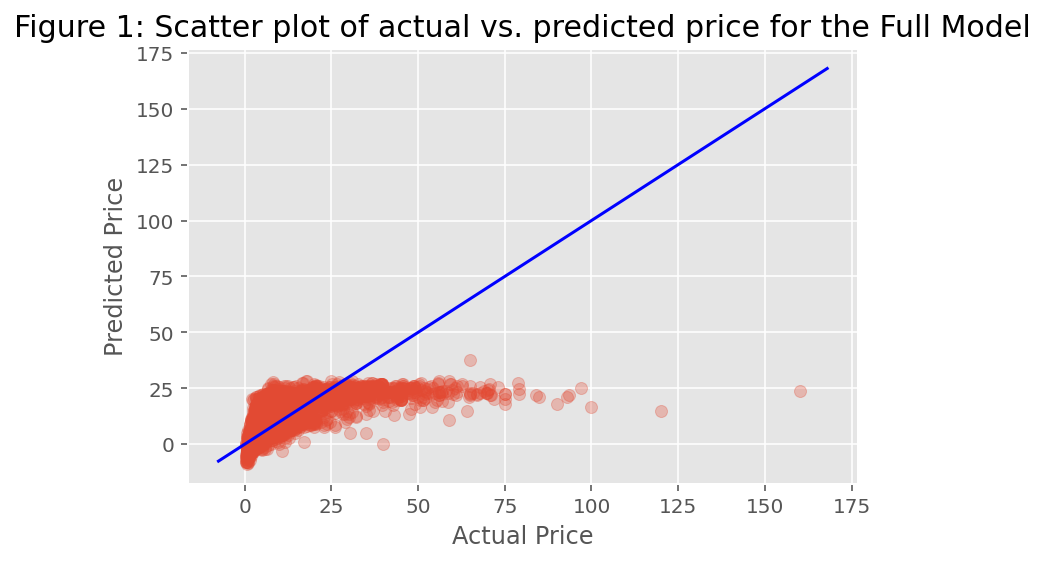

Location             Hyderabad
Year                      2017
Kilometers_Driven        25000
Fuel_Type               Diesel
Transmission         Automatic
Owner_Type               First
Seats                      5.0
Price                    160.0
Name: 4079, dtype: object

In [169]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="blue");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 1: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();
df.loc[df['Price'].idxmax()]

In the Figure 1 above, we can notice that the model does not produce any prediction value above 50, even though the highest price in the dataset is 160.0

## Full Model Diagnostic Checks <a id='full_model_diagnostic_checks'></a>

We shall now be assessing whether any violations were made in the regression assumptions. The asssumptions are as follows:
1) Linear relationship between the target variable and the independant variable.
2) Homoscedasticity of errors.
3) The observations are independant.
4) Errors are normally distributed

Let's first try to get a scatter plot of residuals (as a function of predicted price).


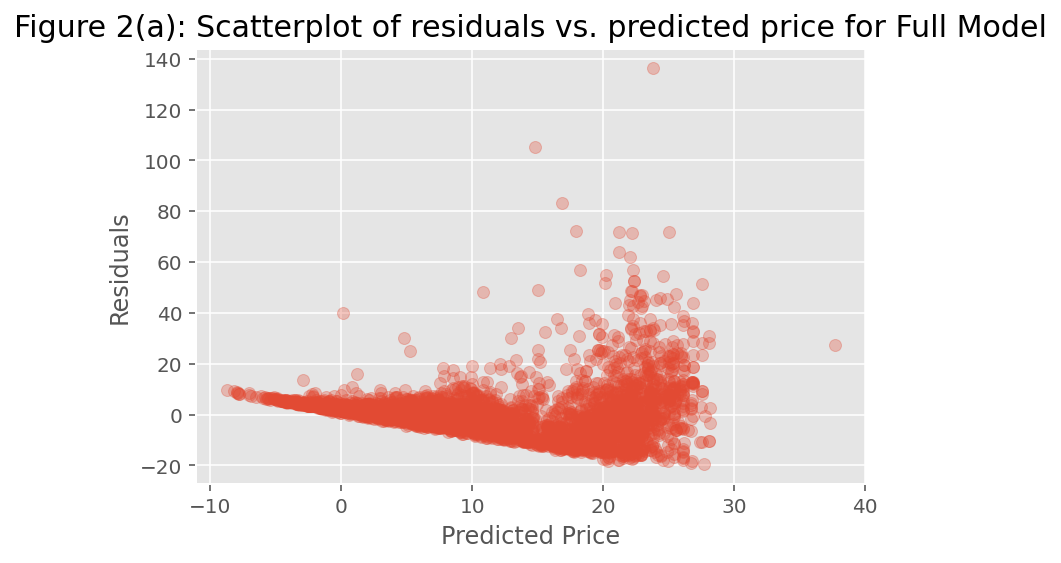

In [170]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Price'); 
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted price for Full Model', fontsize=15)
plt.show();

As we can notice in the Scatterplot Figure 2(a) above, there is a moderately strong, negative association with some outliers too. It shows a banding pattern when the predicted price is below 15.
So on this case, it speciefies that the constant variability assumption of the linear regression is not much satisfied.

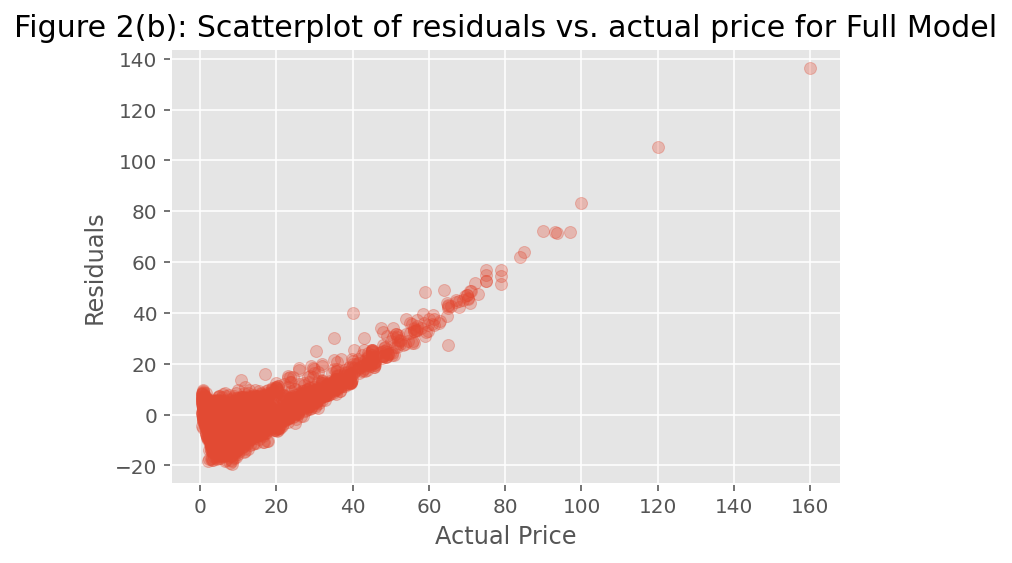

In [175]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Price'); 
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual price for Full Model', fontsize=15)
plt.show();

As we can see the Scatterplot Figure 2(b) above, we can notice that the model underestimates the cheap Actual price of the used cars.

Now, let's try to plot the histogram for Actual Price vs Predicted Price together.

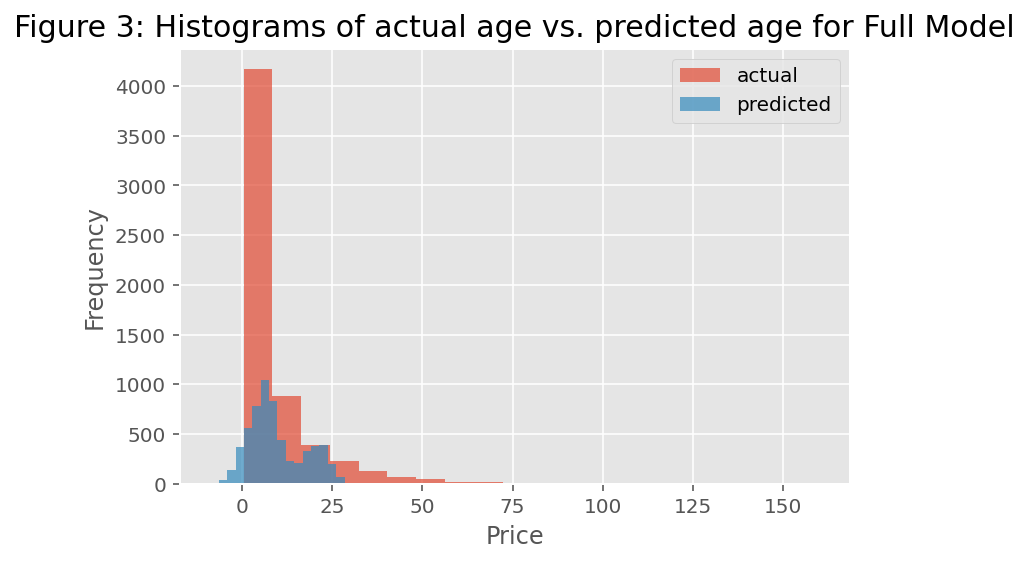

In [177]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of actual age vs. predicted age for Full Model', fontsize=15);
plt.legend()
plt.show();

As we can notice in the Histogram Figure 3 above, the whole distribution is quite of the actual and predicted prices are quite different. We can also notice that the predictions arce highly clustered around 8 to 10 lakh rupees.

Now, let's try to plot a histogrsm of residuals for this model.

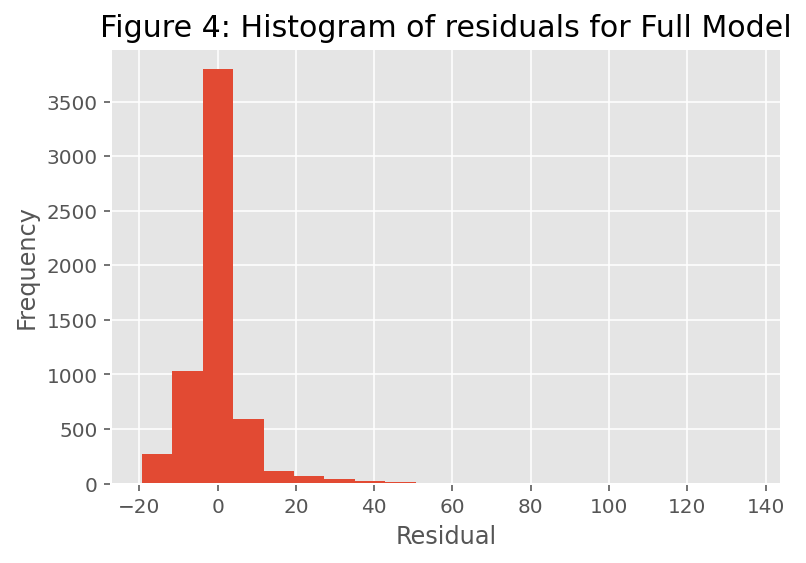

In [178]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From the Histogram Figure 4 above, we can notice that the histogram looks somewhat symmetric and also right-skewed to some degree. We can say that the assumption of linear regresssion not really violated in the above case.

## Backwards Feature Selection <a id='full_model_diagnostic_checks'></a>

Now, we will be performing Backward Feature Selection using p-values.